In [28]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

## Importing data (just original for now)

In [29]:
features_num = [
    'Total_flux', 'Peak_flux', 
       'NUV_flux_corr', 'u_flux_corr', 'Bw_flux_corr', 'R_flux_corr',
       'I_flux_corr', 'z_flux_corr', 'y_flux_corr',
       'J_flux_corr', 'H_flux_corr', 'K_flux_corr', 'Ks_flux_corr',
       'ch1_flux_corr', 'ch2_flux_corr', 'ch3_flux_corr', 'ch4_flux_corr',
       'F_MIPS_24', 'F_PACS_100', 'F_PACS_160', 'F_SPIRE_250', 'F_SPIRE_350',
       'F_SPIRE_500', 'Z_BEST',
       'g_flux_corr', 'nb921_hsc_flux_corr'
    ]
y_column = "Classification"

classes = ['jet-mode radio AGN/low-excitation radio galaxy', 'quasar-like radio AGN / high-excitation radio galaxy', 
           'radio-quiet AGN', 'star-forming galaxy']

In [30]:
data = pd.read_csv("../../Data/Best&Heckman/BestHeckman+SDSS+wise+LOFAR_better_fixed_fluxes.csv")

In [31]:
# Only selecting data with a classification
data = data[data['Classification'] != 'Radio-loud AGN'] 

In [32]:
data.columns

Index(['RAJ2000', 'DEJ2000', 'Z_BEST', 'SimbadName', 'u_flux_corr',
       'g_flux_corr', 'R_flux_corr', 'I_flux_corr', 'z_flux_corr',
       'Classification', 'wise_ra', 'wise_dec', 'ch1_flux_corr',
       'ch2_flux_corr', 'tmass_key', 'J_flux_corr', 'H_flux_corr',
       'Ks_flux_corr', 'E_Total_flux', 'E_Peak_flux', 'Total_flux',
       'Peak_flux'],
      dtype='object')

In [33]:
X = data.drop(columns=['RAJ2000', 'DEJ2000', 'SimbadName','Classification', 'wise_ra', 'wise_dec', 
                        'tmass_key', 'E_Total_flux', 'E_Peak_flux'])
y = data[['Classification']]

# Dropping columns with little data (optional)

In [34]:
X = X.drop(columns=['H_flux_corr', 'Ks_flux_corr',
                   'g_flux_corr'])

## Filling nan's

In [35]:
imp = IterativeImputer(max_iter=100, min_value=0)
X_filled = imp.fit_transform(X)

## Normalisations

In [222]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
X_filled = scaler.fit_transform(X_filled)

## Kmeans

In [98]:
n = 8
kmeans = KMeans(n_clusters=n, random_state=0)
kmeans.fit(X_filled)

KMeans(random_state=0)

In [99]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([9070,    1,   10,    3,   34, 3900,  143,    1]))

In [162]:
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X_filled)
    kmeanModel.fit(X_filled)
  
    distortions.append(sum(np.min(cdist(X_filled, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X_filled.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X_filled, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X_filled.shape[0]
    mapping2[k] = kmeanModel.inertia_

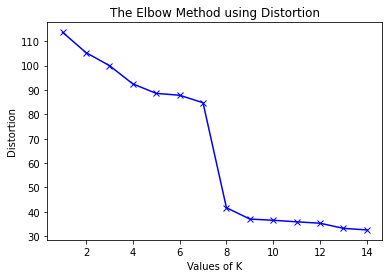

In [84]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [188]:
data['KMeans'] = kmeans.labels_
data.to_csv('Kmeans.csv', index=False)

# Spectral clustering

In [9]:
from sklearn.cluster import SpectralClustering

In [24]:
clustering = SpectralClustering(n_clusters=10, n_jobs=1, verbose=True, 
                               affinity='nearest_neighbors',
                               ).fit(X_filled)
clustering.fit(X_filled)

Computing label assignment using kmeans
Initialization complete
Iteration 0, inertia 0.3162695219649264.
Iteration 1, inertia 0.2308644034066994.
Iteration 2, inertia 0.22303377588492246.
Iteration 3, inertia 0.22094074606714087.
Iteration 4, inertia 0.2206109831984493.
Iteration 5, inertia 0.22047506487630272.
Iteration 6, inertia 0.2204089397758569.
Iteration 7, inertia 0.2203919621273739.
Iteration 8, inertia 0.2203868248343692.
Converged at iteration 8: center shift 6.599538775868249e-10 within tolerance 7.571995051085146e-10.
Initialization complete
Iteration 0, inertia 0.32151394855547416.
Iteration 1, inertia 0.25514014677564056.
Iteration 2, inertia 0.2357239707383549.
Iteration 3, inertia 0.22648727108304084.
Iteration 4, inertia 0.22237100327780326.
Iteration 5, inertia 0.22117179338441936.
Iteration 6, inertia 0.22077027966920715.
Iteration 7, inertia 0.22060790353507537.
Iteration 8, inertia 0.22046479735552363.
Iteration 9, inertia 0.22040648137274826.
Iteration 10, inerti

Initialization complete
Iteration 0, inertia 0.3305720538108269.
Iteration 1, inertia 0.24562941491354395.
Iteration 2, inertia 0.22829244580334754.
Iteration 3, inertia 0.22341246349790655.
Iteration 4, inertia 0.22146395067861058.
Iteration 5, inertia 0.2207957355980301.
Iteration 6, inertia 0.22057132962490453.
Iteration 7, inertia 0.22044531436455683.
Iteration 8, inertia 0.2204016127297512.
Iteration 9, inertia 0.22038895690025598.
Iteration 10, inertia 0.2203849276840609.
Converged at iteration 10: center shift 5.839208866048879e-10 within tolerance 7.571995051085164e-10.
Initialization complete
Iteration 0, inertia 0.355631519475798.
Iteration 1, inertia 0.26872041115531614.
Iteration 2, inertia 0.2508190469446814.
Iteration 3, inertia 0.22995232133133844.
Iteration 4, inertia 0.22112457345526654.
Iteration 5, inertia 0.2205689207693682.
Iteration 6, inertia 0.22045309684752248.
Iteration 7, inertia 0.22040324047197327.
Iteration 8, inertia 0.22039026579726495.
Iteration 9, iner

SpectralClustering(affinity='nearest_neighbors', n_clusters=10, n_jobs=1,
                   verbose=True)

In [25]:
np.unique(clustering.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32),
 array([1285, 1696,  749, 2068, 1357, 1401,  583, 2041, 1790,  192]))

In [27]:
classes = clustering.labels_
for i in range(10):
    print(i, ":")
    print(y.iloc[classes==i].value_counts()/y.value_counts())
    print()

0 :
Classification                                      
jet-mode radio AGN/low-excitation radio galaxy          0.109712
star-forming galaxy                                     0.050463
quasar-like radio AGN / high-excitation radio galaxy    0.138075
dtype: float64

1 :
Classification                                      
jet-mode radio AGN/low-excitation radio galaxy          0.146044
star-forming galaxy                                     0.065568
quasar-like radio AGN / high-excitation radio galaxy    0.163180
dtype: float64

2 :
Classification                                      
jet-mode radio AGN/low-excitation radio galaxy          0.049330
star-forming galaxy                                     0.083076
quasar-like radio AGN / high-excitation radio galaxy    0.052301
dtype: float64

3 :
Classification                                      
jet-mode radio AGN/low-excitation radio galaxy          0.168048
star-forming galaxy                                     0.130793
quasar-li

 # GMM

In [37]:
from sklearn.mixture import GaussianMixture

In [233]:
gm = GaussianMixture(n_components=2, random_state=0)
gm.fit(X_filled)

GaussianMixture(n_components=2, random_state=0)

In [297]:
from scipy.spatial.distance import cdist

bic_means = []
bic_stds = []
K = range(1, 15)

for k in K:
    trial = []
    for i in range(16):
        
        # Building and fitting the model
        gm = GaussianMixture(n_components=k).fit(X_filled)
        gm.fit(X_filled)

        trial.append(gm.bic(X_filled))
    bic_means.append(np.mean(trial))
    bic_stds.append(np.std(trial))

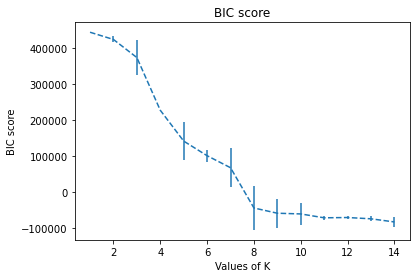

In [307]:
plt.errorbar(x=K, y=bic_means, yerr=bic_stds, ls='--')
plt.xlabel('Values of K')
plt.ylabel('BIC score')
plt.title('BIC score')
plt.show()

In [308]:
gm = GaussianMixture(n_components=8, random_state=0)
gm.fit(X_filled)

GaussianMixture(n_components=8, random_state=0)

In [309]:
data['gmm'] = gm.predict(X_filled)
data.to_csv('gmm.csv', index=False)

In [38]:
gm = GaussianMixture(n_components=5, random_state=0)
gm.fit(X_filled)

classes = gm.predict(X_filled)
for i in range(5):
    print(i, ":")
    print(y.iloc[classes==i].value_counts()/y.value_counts())
    print()

0 :
Classification                                      
jet-mode radio AGN/low-excitation radio galaxy          0.056494
star-forming galaxy                                     0.092001
quasar-like radio AGN / high-excitation radio galaxy    0.284519
dtype: float64

1 :
Classification                                      
jet-mode radio AGN/low-excitation radio galaxy               NaN
quasar-like radio AGN / high-excitation radio galaxy    0.002092
star-forming galaxy                                          NaN
dtype: float64

2 :
Classification                                      
jet-mode radio AGN/low-excitation radio galaxy          0.000205
quasar-like radio AGN / high-excitation radio galaxy    0.004184
star-forming galaxy                                          NaN
dtype: float64

3 :
Classification                                      
jet-mode radio AGN/low-excitation radio galaxy          0.199980
quasar-like radio AGN / high-excitation radio galaxy    0.190377
star-form

In [39]:
classes = gm.predict(X_filled)
for i in range(5):
    print(i, ":")
    print(y.iloc[classes==i].value_counts())
    print()

0 :
Classification                                      
jet-mode radio AGN/low-excitation radio galaxy          552
star-forming galaxy                                     268
quasar-like radio AGN / high-excitation radio galaxy    136
dtype: int64

1 :
Classification                                      
quasar-like radio AGN / high-excitation radio galaxy    1
dtype: int64

2 :
Classification                                      
jet-mode radio AGN/low-excitation radio galaxy          2
quasar-like radio AGN / high-excitation radio galaxy    2
dtype: int64

3 :
Classification                                      
star-forming galaxy                                     2478
jet-mode radio AGN/low-excitation radio galaxy          1954
quasar-like radio AGN / high-excitation radio galaxy      91
dtype: int64

4 :
Classification                                      
jet-mode radio AGN/low-excitation radio galaxy          7263
quasar-like radio AGN / high-excitation radio galaxy     248


In [42]:
X.shape

(13162, 10)

In [41]:
y.value_counts()/y.value_counts().sum()

Classification                                      
jet-mode radio AGN/low-excitation radio galaxy          0.742364
star-forming galaxy                                     0.221319
quasar-like radio AGN / high-excitation radio galaxy    0.036317
dtype: float64

In [310]:
gm = GaussianMixture(n_components=8, random_state=0)
gm.fit(X_filled)

classes = gm.predict(X_filled)
for i in range(8):
    print(i, ":")
    print(y.iloc[classes==i].value_counts()/y.value_counts())
    print()

0 :
Classification                                      
jet-mode radio AGN/low-excitation radio galaxy          0.027837
quasar-like radio AGN / high-excitation radio galaxy    0.211297
star-forming galaxy                                     0.028150
dtype: float64

1 :
Classification                                      
jet-mode radio AGN/low-excitation radio galaxy               NaN
quasar-like radio AGN / high-excitation radio galaxy    0.002092
star-forming galaxy                                          NaN
dtype: float64

2 :
Classification                                      
jet-mode radio AGN/low-excitation radio galaxy          0.000102
quasar-like radio AGN / high-excitation radio galaxy    0.004184
star-forming galaxy                                          NaN
dtype: float64

3 :
Classification                                      
jet-mode radio AGN/low-excitation radio galaxy          0.033262
quasar-like radio AGN / high-excitation radio galaxy    0.075314
star-form